In [1]:
import pandas_datareader as pdr

In [2]:
pwd

'/Users/puranshu'

In [3]:
cd '/Users/puranshu/Desktop/NLP'

/Users/puranshu/Desktop/NLP


In [5]:
df = pdr.get_data_tiingo('AAPL', api_key = 'e90f05ea9c5352cb31fed1cdd535ca87df9426d1') 
#https://api.tiingo.com/documentation/general/overview

In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-28 00:00:00+00:00,93.59,93.660,92.14,92.90,40444914,21.854524,21.870870,21.515929,21.693399,161779656,0.0,1.0
1,AAPL,2016-06-29 00:00:00+00:00,94.40,94.550,93.63,93.97,36531006,22.043669,22.078696,21.863864,21.943259,146124024,0.0,1.0
2,AAPL,2016-06-30 00:00:00+00:00,95.60,95.770,94.30,94.44,35836356,22.323886,22.363583,22.020318,22.053010,143345424,0.0,1.0
3,AAPL,2016-07-01 00:00:00+00:00,95.89,96.465,95.33,95.49,26026540,22.391605,22.525875,22.260837,22.298199,104106160,0.0,1.0
4,AAPL,2016-07-05 00:00:00+00:00,94.99,95.400,94.46,95.39,27705210,22.181442,22.277183,22.057680,22.274848,110820840,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-06-21 00:00:00+00:00,132.30,132.41,129.21,130.30,79663316,132.30,132.41,129.21,130.30,79663316,0.0,1.0
1254,AAPL,2021-06-22 00:00:00+00:00,133.98,134.08,131.62,132.13,74783618,133.98,134.08,131.62,132.13,74783618,0.0,1.0
1255,AAPL,2021-06-23 00:00:00+00:00,133.70,134.32,133.23,133.77,60214200,133.70,134.32,133.23,133.77,60214200,0.0,1.0
1256,AAPL,2021-06-24 00:00:00+00:00,133.41,134.64,132.93,134.45,68710998,133.41,134.64,132.93,134.45,68710998,0.0,1.0
1257,AAPL,2021-06-25 00:00:00+00:00,133.11,133.89,132.81,133.46,70783746,133.11,133.89,132.81,133.46,70783746,0.0,1.0


In [12]:
df1 = df.reset_index()['close']

In [14]:
df1.shape

(1258,)

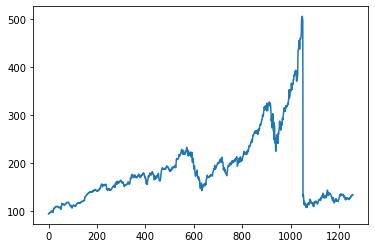

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of data, thats why we apply min max scaler

In [17]:
import numpy as np

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1.shape

(1258, 1)

In [20]:
df1

array([[0.        ],
       [0.00196364],
       [0.00487273],
       ...,
       [0.09723636],
       [0.09653333],
       [0.09580606]])

split train and test because data next data is dependent on prev data we will split it in oredered manner 

In [21]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [23]:
train_size, test_size , len(train_data), len(test_data)

(817, 441, 817, 441)

In [24]:
#convert array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [25]:
#rehape into X = t,t+1,.....t+99 and y = t+100
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [27]:
X_train.shape,y_train.shape

((716, 100), (716,))

In [28]:
X_test.shape,y_test.shape

((340, 100), (340,))

Reshape the input to be [sample,time_step,features] which is required for LSTM

In [29]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Create LSTM models

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 322ms/step - loss: 0.0198 - val_loss: 0.0442
Epoch 2/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0029 - val_loss: 0.0273
Epoch 3/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0016 - val_loss: 0.0261
Epoch 4/100
12/12 [==============================] - 2s 169ms/step - loss: 9.2085e-04 - val_loss: 0.0223
Epoch 5/100
12/12 [==============================] - 2s 171ms/step - loss: 6.1688e-04 - val_loss: 0.0209
Epoch 6/100
12/12 [==============================] - 2s 169ms/step - loss: 4.5601e-04 - val_loss: 0.0213
Epoch 7/100
12/12 [==============================] - 2s 169ms/step - loss: 4.7334e-04 - val_loss: 0.0204
Epoch 8/100
12/12 [==============================] - 2s 170ms/step - loss: 4.4701e-04 - val_loss: 0.0193
Epoch 9/100
12/12 [==============================] - 2s 168ms/step - loss: 4.2083e-04 - val_loss: 0.0192
Epoch 10/100
12/12 [==============================] - 2s 166ms/step

In [34]:
import tensorflow as tf

Predict the data and transform back to original data

In [35]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [36]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

check performance

In [38]:
#performance of train data
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

175.7182571562715

In [39]:
#performance of test data
math.sqrt(mean_squared_error(y_test,test_pred))

237.36761881547534

Plot 

In [40]:
#shift train prediction for ploting
look_back = 100
train_predict_plot = np.empty_like(df1)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back:len(train_pred)+look_back,:] = train_pred

In [41]:
#shift test prediction for ploting
look_back = 100
test_predict_plot = np.empty_like(df1)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_pred)+(look_back*2)+1:len(df1)-1,:] = test_pred

Blue color -> Complete dataset

Green color -> Test data predicted output(previous 100 values missing b/c used as feature to predict)

Orange color -> Train data predicted output(previous 100 values missing b/c used as feature to predict)

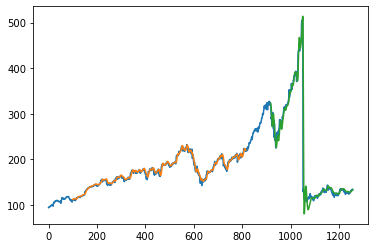

In [42]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [44]:
len(test_data)

441

In [45]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [47]:
temp_input

[0.09781818181818178,
 0.10618181818181813,
 0.10465454545454542,
 0.10501818181818182,
 0.10283636363636359,
 0.1013333333333333,
 0.10070303030303027,
 0.1012848484848485,
 0.096,
 0.0903030303030303,
 0.08756363636363637,
 0.08795151515151514,
 0.07856969696969698,
 0.07823030303030301,
 0.07699393939393936,
 0.06642424242424241,
 0.06707878787878788,
 0.0829090909090909,
 0.07643636363636366,
 0.06901818181818184,
 0.06433939393939389,
 0.06746666666666665,
 0.0552,
 0.06665454545454544,
 0.0639757575757576,
 0.06877575757575757,
 0.06652121212121212,
 0.07369696969696968,
 0.0775272727272727,
 0.07556363636363636,
 0.0653090909090909,
 0.06399999999999997,
 0.07224242424242425,
 0.0701818181818182,
 0.06424242424242424,
 0.06545454545454546,
 0.06695757575757574,
 0.06739393939393937,
 0.06378181818181819,
 0.06923636363636362,
 0.07129696969696966,
 0.07832727272727272,
 0.07907878787878783,
 0.0831757575757576,
 0.08913939393939393,
 0.09552727272727271,
 0.09127272727272731,
 0

prediction for next 10 days

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09879085]
101
1 day input [0.10618182 0.10465455 0.10501818 0.10283636 0.10133333 0.10070303
 0.10128485 0.096      0.09030303 0.08756364 0.08795152 0.0785697
 0.0782303  0.07699394 0.06642424 0.06707879 0.08290909 0.07643636
 0.06901818 0.06433939 0.06746667 0.0552     0.06665455 0.06397576
 0.06877576 0.06652121 0.07369697 0.07752727 0.07556364 0.06530909
 0.064      0.07224242 0.07018182 0.06424242 0.06545455 0.06695758
 0.06739394 0.06378182 0.06923636 0.07129697 0.07832727 0.07907879
 0.08317576 0.08913939 0.09552727 0.09127273 0.09900606 0.09318788
 0.09917576 0.09835152 0.1        0.09580606 0.09675152 0.0929697
 0.09873939 0.09970909 0.09890909 0.09694545 0.09670303 0.09180606
 0.09442424 0.08305455 0.08366061 0.08763636 0.08877576 0.0806303
 0.07835152 0.07073939 0.07607273 0.08208485 0.07922424 0.07578182
 0.07539394 0.08174545 0.07718788 0.08123636 0.08075152 0.0806303
 0.07682424 0.0752     0.0744     0.07629091 0.07260606 0.07830303
 0.07832727 0.08036364 0.08130909 0.0

In [49]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

1258

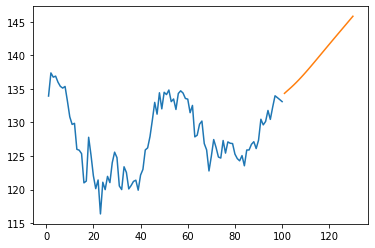

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

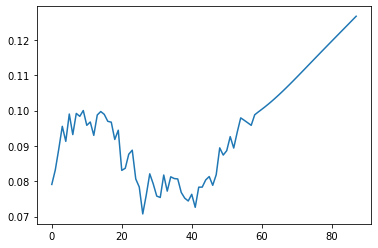

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

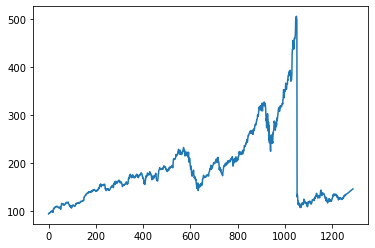

In [54]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)